In [82]:
# 데이터분석 패키지 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# 자치구별-년도별 5대 범죄 현황 엑셀파일을 읽어서 데이터프레임 만들기

paths = "../data-files/seoul-crime.xlsx"

crime = pd.read_excel(paths)

print(crime.info())
crime.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Columns: 122 entries, 자치구별(1) to 2023.11
dtypes: object(122)
memory usage: 27.8+ KB
None


c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),2014,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,...,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,...,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),소계,소계,살인,살인,강도,강도,강간·강제추행,강간·강제추행,...,살인,살인,강도,강도,강간·강제추행,강간·강제추행,절도,절도,폭력,폭력
2,자치구별(1),자치구별(2),발생,검거,발생,검거,발생,검거,발생,검거,...,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
3,합계,소계,130674,79061,158,152,343,299,5462,4957,...,150,144,129,117,5764,5395,37038,21600,43132,37567
4,NaN,종로구,5021,4610,3,7,12,15,226,948,...,5,6,5,7,239,1138,1169,953,1563,1381


In [84]:
seoul_crime = crime.copy()
seoul_crime.drop([0,1,2,3], axis=0, inplace=True)
seoul_crime.drop(crime.columns[:1], axis=1, inplace=True)

# 컬럼명 변경
clms = seoul_crime.columns
crimeList = ["합계", "살인", "강도", "강간", "절도", "폭력"]

seoul_crime.rename(columns={clms[0]:"자치구"}, inplace=True)

i = 1
for j in range(2014,2024):
    for k in crimeList:
        seoul_crime.rename(columns={clms[i]:str(j)+"발생"+k}, inplace=True)
        seoul_crime.rename(columns={clms[i+1]:str(j)+"검거"+k}, inplace=True)
        i += 2

# 인덱스 변경 
seoul_crime.set_index("자치구", inplace=True)

# 형변환
seoul_crime.replace('-', '0',inplace=True)
seoul_crime = seoul_crime.astype(int)


print(seoul_crime.info())
seoul_crime

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Columns: 120 entries, 2014발생합계 to 2023검거폭력
dtypes: int64(120)
memory usage: 23.6+ KB
None


,2014발생합계,2014검거합계,2014발생살인,2014검거살인,2014발생강도,2014검거강도,2014발생강간,2014검거강간,2014발생절도,2014검거절도,...,2023발생살인,2023검거살인,2023발생강도,2023검거강도,2023발생강간,2023검거강간,2023발생절도,2023검거절도,2023발생폭력,2023검거폭력
자치구,,,,,,,,,,,,,,,,,,,,,
종로구,5021,4610,3,7,12,15,226,948,2272,1281,...,5,6,5,7,239,1138,1169,953,1563,1381
중구,5231,3188,6,5,13,13,221,161,2576,887,...,3,3,6,5,212,144,1520,864,1607,1449
용산구,3799,2340,1,2,7,7,213,169,1560,522,...,3,4,3,3,245,219,978,561,1792,1481
성동구,3582,2048,1,1,5,6,141,103,1753,529,...,2,1,2,2,119,85,893,472,1007,851
광진구,6268,3531,8,9,16,22,249,199,3167,1001,...,2,2,5,3,238,178,1616,830,1563,1320
동대문구,4363,2882,12,11,13,8,141,112,1809,676,...,5,6,4,3,146,116,1280,847,1522,1329
중랑구,5353,3259,11,10,14,11,163,118,2390,823,...,6,6,2,2,169,134,1402,786,1745,1546
성북구,4606,3028,8,5,16,20,165,128,2130,935,...,1,1,1,1,141,112,984,683,1284,1161
강북구,4030,2806,6,5,21,10,189,152,1494,575,...,7,7,1,1,141,102,917,730,1431,1302


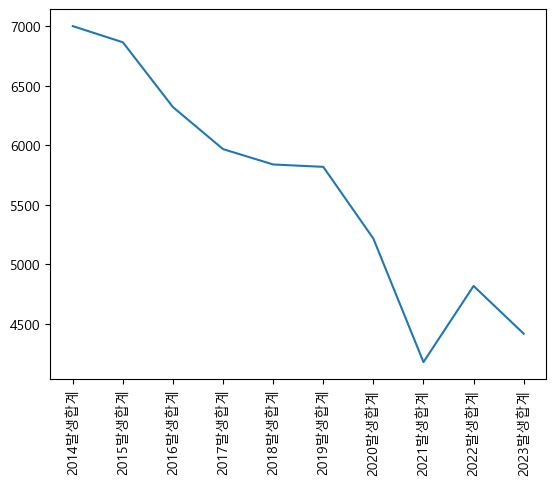

10 ['2014발생합계', '2015발생합계', '2016발생합계', '2017발생합계', '2018발생합계', '2019발생합계', '2020발생합계', '2021발생합계', '2022발생합계', '2023발생합계']
10 [np.int64(7003), np.int64(6867), np.int64(6322), np.int64(5969), np.int64(5840), np.int64(5820), np.int64(5217), np.int64(4179), np.int64(4819), np.int64(4418)]


In [85]:
# 영등포구 최근 10년간 범죄 발생 추이 시각화 
ydp = seoul_crime.loc["영등포구"]


# 한글 폰트로 변경
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams["font.family"] = font_name

x1 = [ydp.index[v] for v in range(0, len(ydp) , 12)]
y1 = [ydp.iloc[v] for v in range(0, len(ydp) , 12)]
plt.Figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.plot(x1, y1)
plt.show()

print(len(x1), x1)
print(len(y1), y1)


In [86]:
# seoul_crime2 생성

years = pd.Series(range(2014,2024))
murder = pd.Series(seoul_crime[str(v)+"발생살인"].sum() for v in range(2014, 2024))
robber = pd.Series(seoul_crime[str(v)+"발생강도"].sum() for v in range(2014, 2024))
rape =  pd.Series(seoul_crime[str(v)+"발생강간"].sum() for v in range(2014, 2024))
thief = pd.Series(seoul_crime[str(v)+"발생절도"].sum() for v in range(2014, 2024))
violence = pd.Series(seoul_crime[str(v)+"발생폭력"].sum() for v in range(2014, 2024))

seoul_crime2 = pd.DataFrame({"year":years, "murder":murder, "robber":robber,
                              "rape":rape, "thief":thief, "violence":violence})

seoul_crime2["all"] = seoul_crime2.iloc[:, 1:].sum(axis=1)

seoul_crime2.set_index("year", inplace=True)
seoul_crime2

,murder,robber,rape,thief,violence,all
year,,,,,,
2014,158,343,5462,59393,65318,130674
2015,163,276,5449,55307,65206,126401
2016,148,262,6002,46857,64570,117839
2017,142,169,6963,41162,59399,107835
2018,143,143,6412,39175,56075,101948
2019,136,136,6469,42204,54723,103668
2020,141,138,5763,38293,48344,92679
2021,124,122,4911,33531,41757,80445
2022,104,117,5816,37579,46783,90399


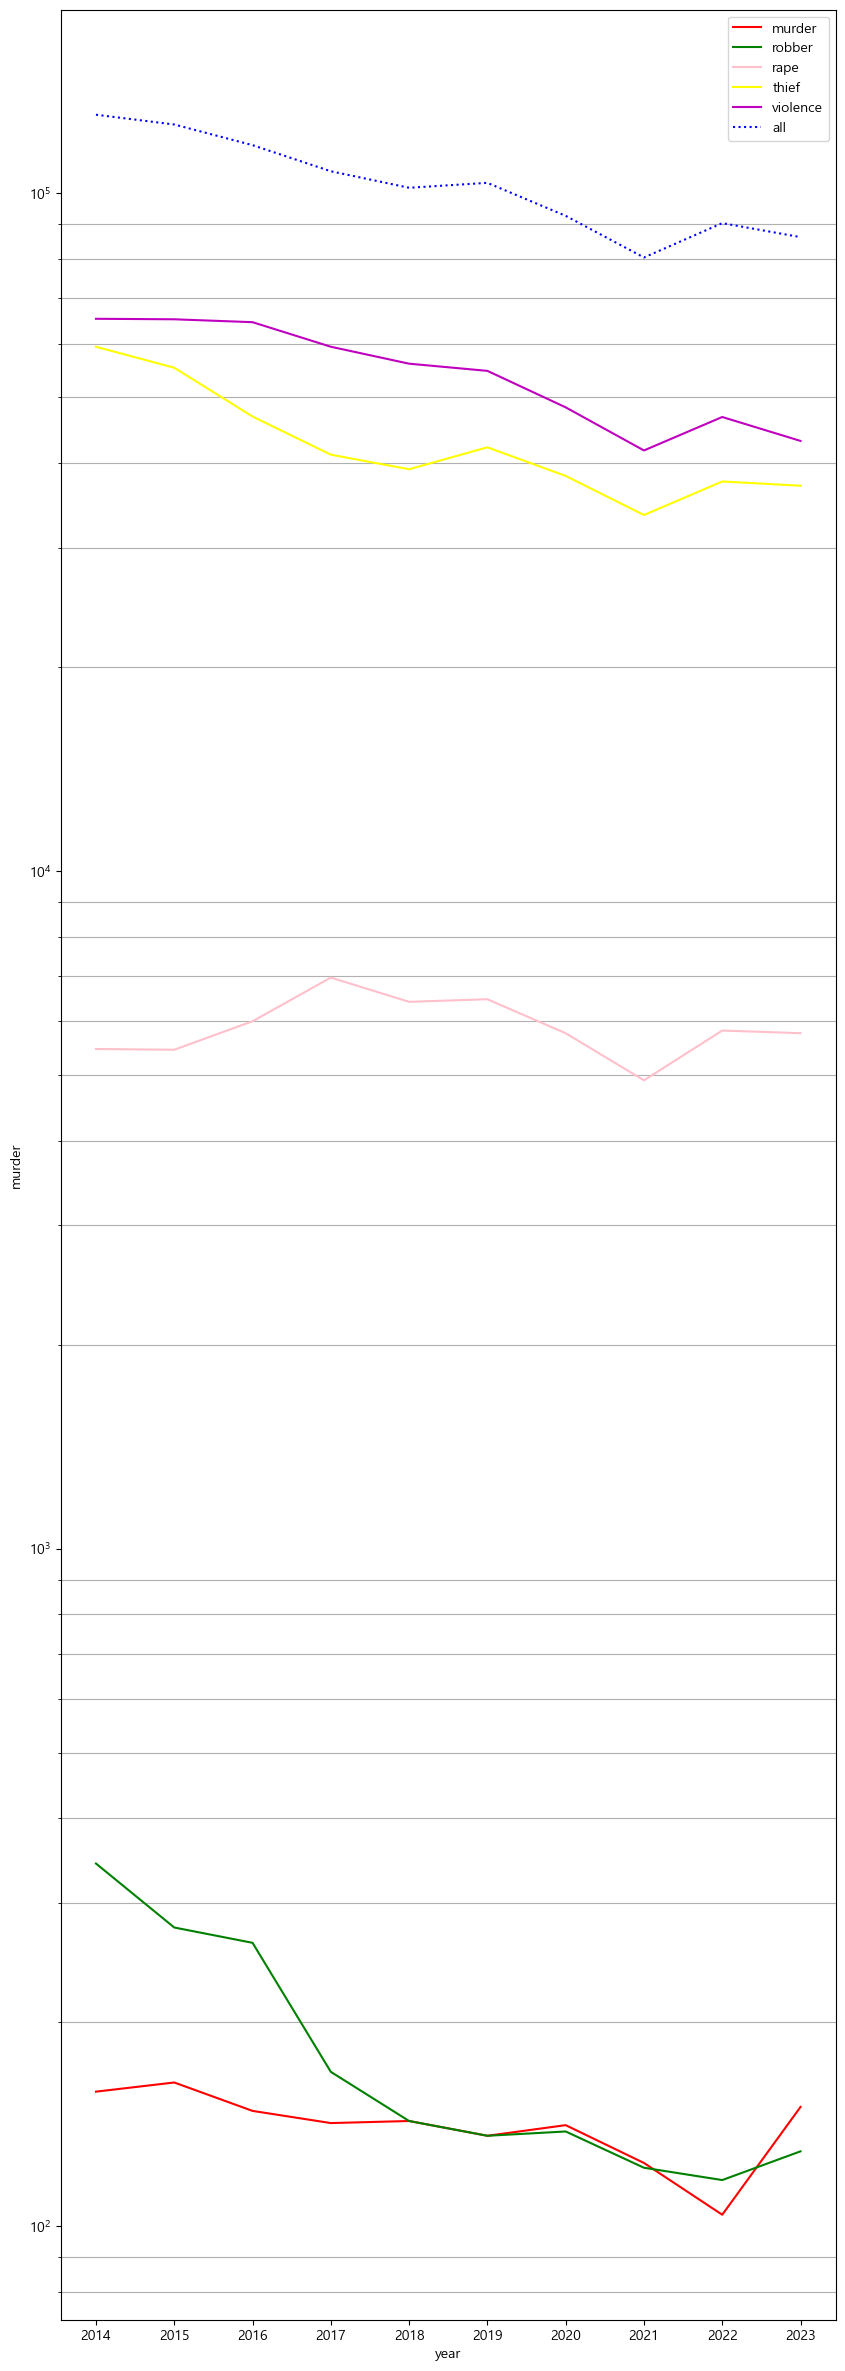

In [100]:
fig, ax = plt.subplots(figsize=(10, 30))

sns.lineplot(x="year", y="murder", label="murder", color="red", data=seoul_crime2, ax=ax)
sns.lineplot(x="year", y="robber", label="robber", color="green", data=seoul_crime2, ax=ax)
sns.lineplot(x="year", y="rape", label="rape", color="pink", data=seoul_crime2, ax=ax)
sns.lineplot(x="year", y="thief", label="thief", color="yellow", data=seoul_crime2, ax=ax)
sns.lineplot(x="year", y="violence", label="violence", color="m", data=seoul_crime2, ax=ax)
sns.lineplot(x="year", y="all", label="all", color="blue", linestyle=":", data=seoul_crime2, ax=ax)
plt.yscale("log")


plt.xticks([v for v in range(2014,2024)])
plt.grid(True, which="minor")
plt.legend()
plt.show()

In [88]:
a = [1,2,3,4,5]
b = ['a', 'b', 'c', 'd', 'e']

for v1, v2 in zip(a,b):
    print(v1, v2)

1 a
2 b
3 c
4 d
5 e


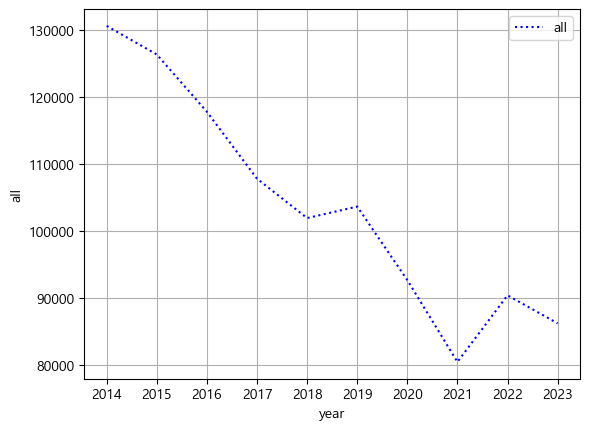

In [89]:
sns.lineplot(x="year", y="all", label="all", color="blue", linestyle=":", data=seoul_crime2)
plt.xticks([v for v in range(2014,2024)])
plt.grid(True)
plt.legend()
plt.show()